# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## XIII. Analyse des simulations

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from data_formatting import Formater

colors = ["steelblue", "Mediumaquamarine", "#FFE066", "slateblue", "#FFD8A8", "Lightslategray", "grey", "#09F1D3", "#74C0FC"]

## 1. Analyse profils de production

In [2]:
vre2006 = pd.read_csv('inputs/vre_profiles2006.csv', header=None)
vre2006 = Formater(vre2006, '2006-01-01')
vrenew_typical_days_new_trend_2006 = pd.read_csv('inputs/vrenew_typical_days_new_trend_2006.csv', header=None)
vrenew_typical_days_new_trend_2006 = Formater(vrenew_typical_days_new_trend_2006, '2006-01-01')
vrenew_fourier = pd.read_csv('inputs/vrenew_fourier_profile.csv', header=None)
vrenew_fourier = Formater(vrenew_fourier, '2006-01-01')

C:\Users\teaca\OneDrive - insa-toulouse.fr\Documents\INSA\4A\4A.Stage\4A.Stage.Codes_ENR\data_formatting.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profil_offshore['heure'] = pd.to_datetime(profil_offshore['heure'], unit='h', origin=pd.Timestamp(time))
C:\Users\teaca\OneDrive - insa-toulouse.fr\Documents\INSA\4A\4A.Stage\4A.Stage.Codes_ENR\data_formatting.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profil_pv['heure'] = pd.to_datetime(profil_pv['heure'], unit='h', origin=pd.Timestamp(time)

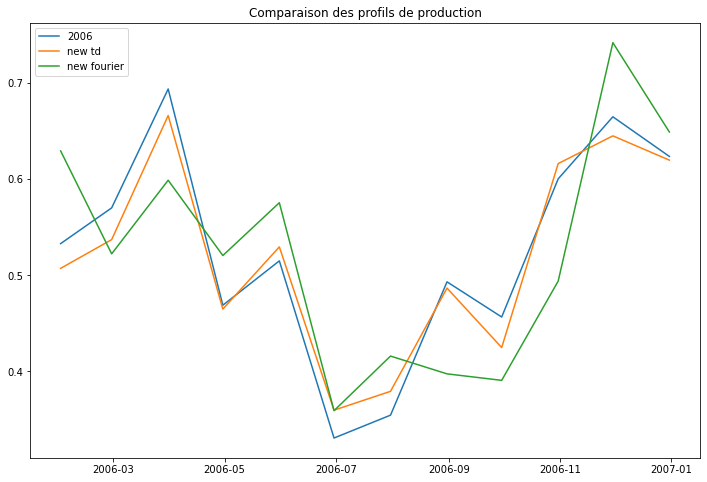

Mean 2006 0.525416275278312
Mean New 0.5199739725887002


In [3]:
vre = 'offshore'

plt.figure(figsize=(12,8))
plt.plot(vre2006[vre].resample('M').mean(), label='2006')
plt.plot(vrenew_typical_days_new_trend_2006[vre].resample('M').mean(), label='new td')
plt.plot(vrenew_fourier[vre].resample('M').mean(), label='new fourier')
plt.title('Comparaison des profils de production')
plt.legend()
plt.show()

print('Mean 2006 ' + str(np.mean(vre2006[vre])))
print('Mean New ' + str(np.mean(vrenew_typical_days_new_trend_2006[vre])))

## 2. Analyse des variations du coût pour une capacité installée donnée

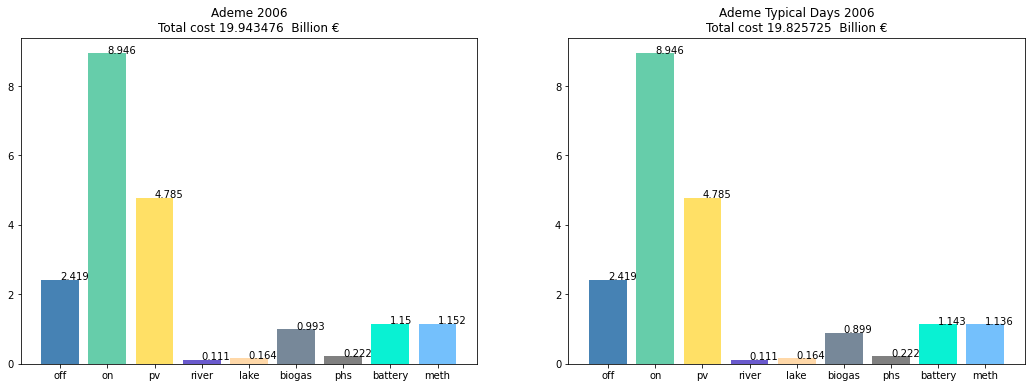

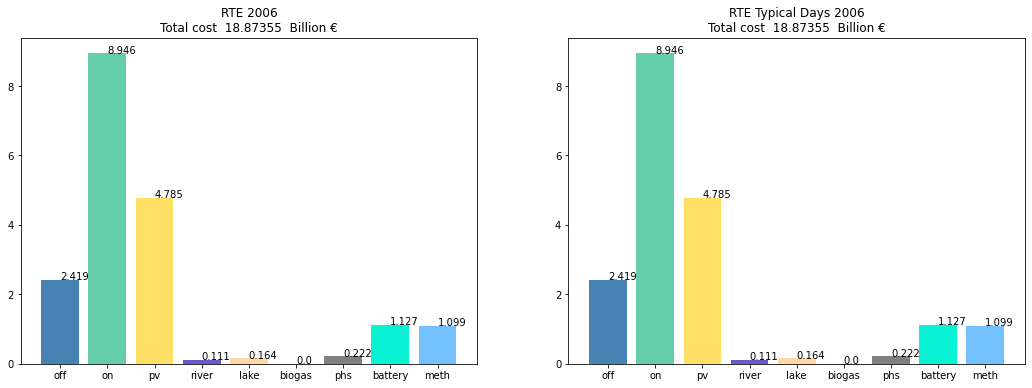

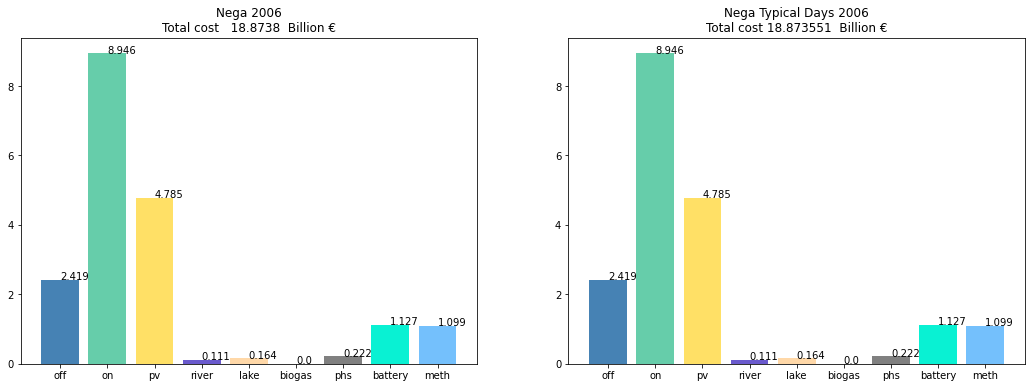

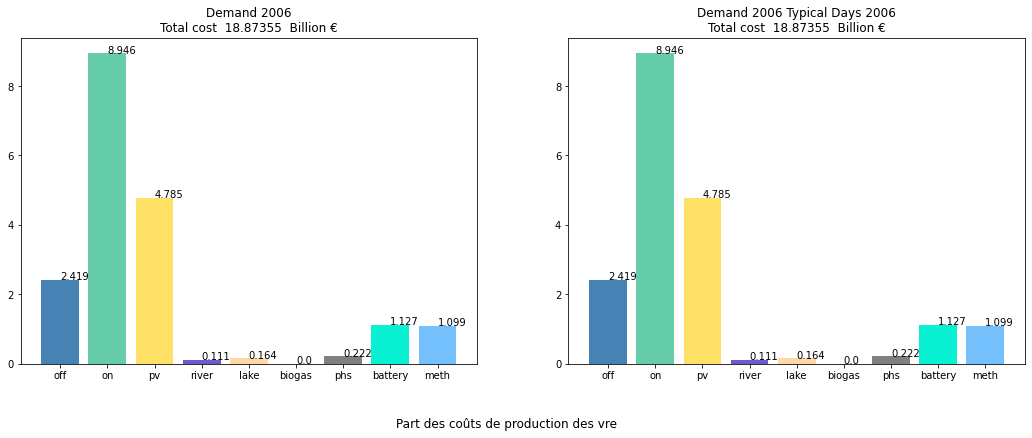

In [4]:
list_simu = ['vre2006_ademe', 'td2006_ademe', 'vre2006_rte', 'td2006_rte', 'vre2006_nega', 'td2006_nega', 'vre2006_d2006', 'td2006_d2006']
list_sc = ["Ademe 2006", "Ademe Typical Days 2006", "RTE 2006", "RTE Typical Days 2006", "Nega 2006", "Nega Typical Days 2006",  "Demand 2006", 
          "Demand 2006 Typical Days 2006"]

n_scenarios = len(list_simu)
fig, axs = plt.subplots(1,2, figsize=(18,6))
fig2, axs2 = plt.subplots(1,2, figsize=(18,6))
fig3, axs3 = plt.subplots(1,2, figsize=(18,6))
fig4, axs4 = plt.subplots(1,2, figsize=(18,6))
    

for i in range(len(list_simu)):
    name_load_factor = list_simu[i]
    C_file = pd.read_csv("simulations/optimal_simulations/simu_opti_"+name_load_factor+"/simu_opti_"+name_load_factor+"_Cost.csv", names=['vre', 'cost'])
    C_cost = C_file['cost'][1]
    
    tec = []
    y = []
    for k in range(2,11):
        tec += [C_file['vre'][k]]
        y += [float(C_file['cost'][k])]
    tec[0] = tec[0][:3]
    tec[1] = tec[1][:2]
    tec[-1] = tec[-1][:4]
    y = np.array(y)
    
    if i < 2:
        b = axs[i].bar(tec, y, color=colors)
        axs[i].set_title(list_sc[i] + "\n" + "Total cost " + str(C_cost[73:82]) + "  Billion €")
        for v,w in enumerate(y):
            axs[i].text(v, w, str(round(w,3)))
        
    elif i>=2 and i<4:
        b = axs2[i-2].bar(x=tec, height = y, color=colors)
        axs2[i-2].set_title(list_sc[i] + "\n" + "Total cost " + str(C_cost[73:82]) + "  Billion €")
        for v,w in enumerate(y):
            axs2[i-2].text(v, w, str(round(w,3)))
            
    elif i>=4 and i<6:
        b = axs3[i-4].bar(x=tec, height = y, color=colors)
        axs3[i-4].set_title(list_sc[i] + "\n" + "Total cost " + str(C_cost[73:82]) + "  Billion €")
        for v,w in enumerate(y):
            axs3[i-4].text(v, w, str(round(w,3)))
            
    else:
        b = axs4[i-6].bar(x=tec, height = y, color=colors)
        axs4[i-6].set_title(list_sc[i] + "\n" + "Total cost " + str(C_cost[73:82]) + "  Billion €")
        for v,w in enumerate(y):
            axs4[i-6].text(v, w, str(round(w,3)))
        
        
    Q_file = pd.read_csv("simulations/optimal_simulations/simu_opti_"+name_load_factor+"/simu_opti_"+name_load_factor+"_Q.csv", names=['vre', 'capa'])
    y = np.array([Q_file["capa"][1], Q_file["capa"][2], Q_file["capa"][3]])


plt.suptitle("Part des coûts de production des vre", y=0)
plt.show()


optimum stable avec leger changement de météo ?  faire un boxplot
si je fixe les capacités installées => est ce que cout change / est ce jarrive a repondre à la demande

je fixe un mix et je simule plusieurs meteo et je regarde la variation du cout 

semaines sans vent ou sans soleil ?


composition du mix différent mais cout (optimum) similaire ? 

## 3. Analyse de l'optimisation de la capacité de production installée :

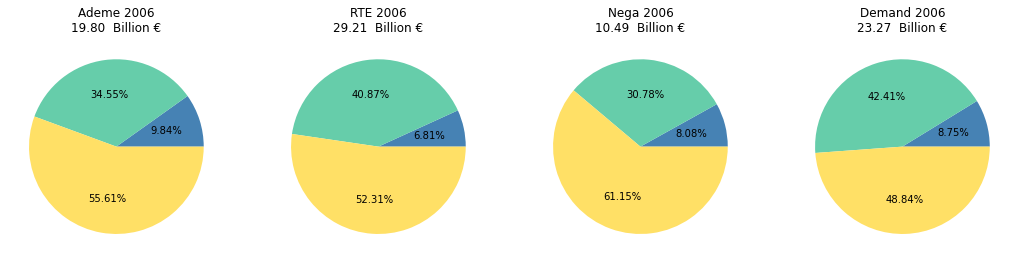

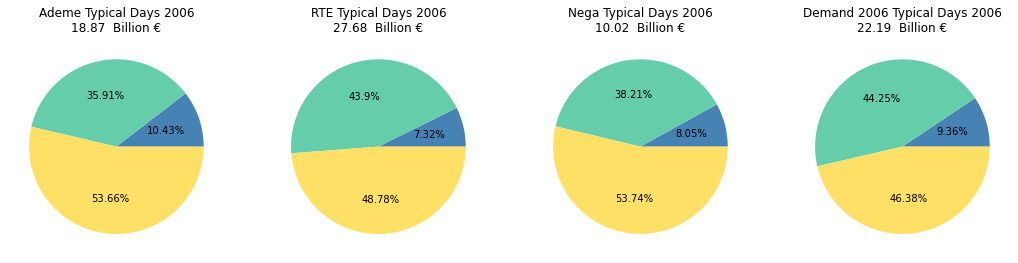

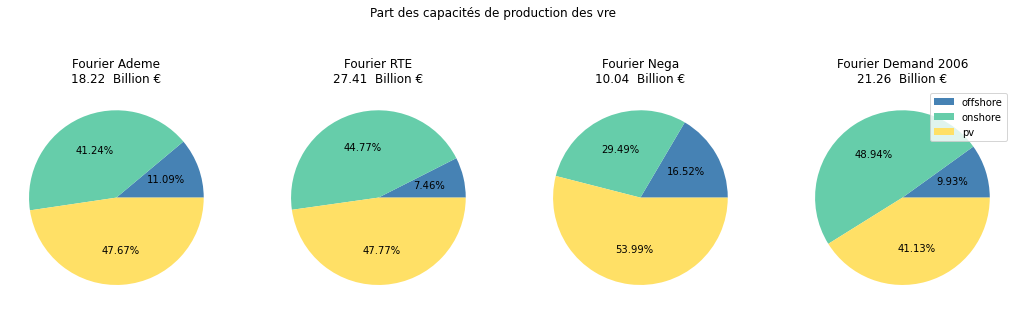

In [5]:
list_simu = ['vre2006_ademe', 'vre2006_rte', 'vre2006_nega', 'vre2006_d2006', 
             'td2006_ademe', 'td2006_rte', 'td2006_nega', 'td2006_d2006', 
             'fourier_ademe', 'fourier_rte', 'fourier_nega', 'fourier_d2006']

list_sc = ["Ademe 2006", "RTE 2006", "Nega 2006", "Demand 2006", 
           "Ademe Typical Days 2006", "RTE Typical Days 2006", "Nega Typical Days 2006", "Demand 2006 Typical Days 2006",
           "Fourier Ademe", "Fourier RTE", "Fourier Nega", "Fourier Demand 2006"]

n_scenarios = len(list_simu)
fig, axs = plt.subplots(1,int(n_scenarios/3), figsize=(18,18))
fig2, axs2 = plt.subplots(1,int(n_scenarios/3), figsize=(18,18))
fig3, axs3 = plt.subplots(1,int(n_scenarios/3), figsize=(18,18))

for i in range(n_scenarios):
    name_load_factor = list_simu[i]
    cost = pd.read_csv("simulations/complete_simulations/simu_"+name_load_factor+"/simu_"+name_load_factor+"_Cost.csv", names=['vre', 'cost'])
    capa = pd.read_csv("simulations/complete_simulations/simu_"+name_load_factor+"/simu_"+name_load_factor+"_Q.csv", names=['vre', 'capa'])

    y = np.array([capa["capa"][1], capa["capa"][2], capa["capa"][3]])
    cost = cost['vre'][0]
    
    if i < int(n_scenarios/3):
        wedges, texts, autotexts = axs[i].pie(y, autopct = lambda y: str(round(y, 2)) + '%', colors=colors)
        axs[i].set_title(list_sc[i] + "\n" + str(cost[:5]) + "  Billion €")
    elif i>=int(n_scenarios/3) and i<int(n_scenarios/3)*2:
        wedges, texts, autotexts = axs2[i-int(n_scenarios/3)].pie(y, autopct = lambda y: str(round(y, 2)) + '%', colors=colors)
        axs2[i-int(n_scenarios/3)].set_title(list_sc[i] + "\n" + str(cost[:5]) + "  Billion €")
    else:
        wedges, texts, autotexts = axs3[i-int(n_scenarios/3)*2].pie(y, autopct = lambda y: str(round(y, 2)) + '%', colors=colors)
        axs3[i-int(n_scenarios/3)*2].set_title(list_sc[i] + "\n" + str(cost[:5]) + "  Billion €")
        
    
axs3[i-int(n_scenarios/3)*2].legend(wedges, ["offshore", "onshore", "pv"])

plt.suptitle("Part des capacités de production des vre", y=0.65)
plt.show()

plt.show()

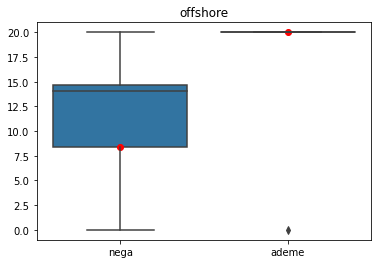

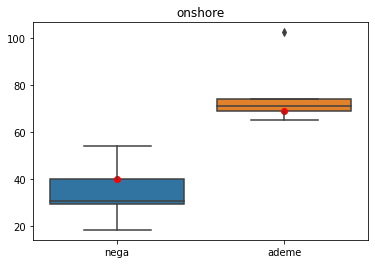

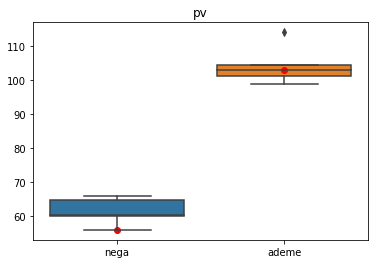

In [11]:
import seaborn as sns

for vre in [1,2,3]:
    list_capa_rte = []
    list_capa_ademe = []
    list_capa_nega = []
    
    for sce in ['ademe', 'nega']:
        for i in range(2012,2017):

            if i == 2014:
                continue 

            name_load_factor = "simu_" + str(i) + "_" + sce
            capa = pd.read_csv("simulations/complete_simulations/"+name_load_factor+"/"+name_load_factor+"_Q.csv", names=['vre', 'capa'])

            if sce == 'rte':
                list_capa_rte += [capa['capa'][vre]]
            elif sce == 'ademe':
                list_capa_ademe += [capa['capa'][vre]]
            else:
                list_capa_nega += [capa['capa'][vre]]
    
    capa_nega = pd.read_csv("simulations/complete_simulations/"+"simu_td2006_nega"+"/"+"simu_td2006_nega"+"_Q.csv", names=['vre', 'capa'])
    list_capa_nega += [capa_nega['capa'][vre]]
    
    capa_ademe = pd.read_csv("simulations/complete_simulations/"+"simu_td2006_ademe"+"/"+"simu_td2006_ademe"+"_Q.csv", names=['vre', 'capa'])
    list_capa_ademe += [capa_ademe['capa'][vre]]
                
    list_capa = np.array([list_capa_nega, list_capa_ademe]).T
    sns.boxplot(data=list_capa)
    plt.scatter([0,1],[list_capa_nega[-1], list_capa_ademe[-1]], c='r')
    plt.xticks([0,1], ["nega", "ademe"])
    plt.title(capa['vre' ][vre])
    plt.show()

## 4. Analyse du mix heure par heure

In [6]:
from ipywidgets import interactive, interact_manual
import ipywidgets as widgets
from complete_model import show_simu

In [7]:
list_simu = ['vre2006_ademe', 'vre2006_rte', 'vre2006_nega', 'vre2006_d2006', 'td2006_ademe', 'td2006_rte', 'td2006_nega', 'td2006_d2006', "fourier_ademe", "fourier_rte", "fourier_d2006"]
interactive_plot = interact_manual(show_simu, week=widgets.IntText(value = 1), name = list_simu, opti=False)
interactive_plot

interactive(children=(IntText(value=1, description='week'), Dropdown(description='name', options=('vre2006_ade…

<function complete_model.show_simu(week, name, opti=True)>

In [8]:
interactive_plot = interact_manual(show_simu, week=widgets.IntText(value = 1), name = list_simu, opti=False)
interactive_plot

interactive(children=(IntText(value=1, description='week'), Dropdown(description='name', options=('vre2006_ade…

<function complete_model.show_simu(week, name, opti=True)>

In [9]:
interactive_plot = interact_manual(show_simu, week=widgets.IntText(value = 1), name=list_simu, opti=False)
interactive_plot

interactive(children=(IntText(value=1, description='week'), Dropdown(description='name', options=('vre2006_ade…

<function complete_model.show_simu(week, name, opti=True)>